In [ ]:
# Perform standard imports
import spacy
nlp = spacy.load('en_core_web_sm')


### **Part of Speech Basics**
The challenge of correctly identifying parts of speech is summed up nicely in the spaCy docs:

Processing raw text intelligently is difficult: most words are rare, and it's common for words that look completely different to mean almost the same thing. The same words in a different order can mean something completely different. Even splitting text into useful word-like units can be difficult in many languages. While it's possible to solve some problems starting from only the raw characters, it's usually better to use linguistic knowledge to add useful information. That's exactly what spaCy is designed to do: you put in raw text, and get back a **Doc** object, that comes with a variety of annotations.
In this section we'll take a closer look at coarse POS tags (noun, verb, adjective) and fine-grained tags (plural noun, past-tense verb, superlative adjective). !

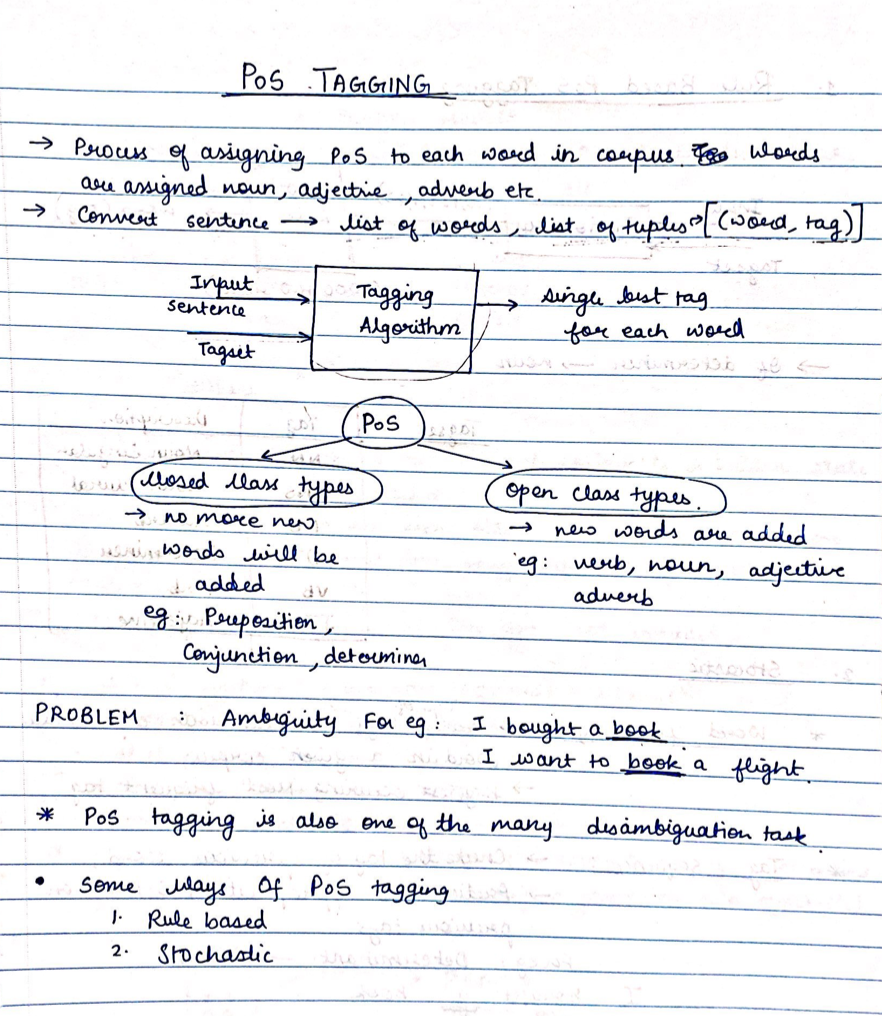

In [ ]:
# Create a simple Doc object
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

## View token tags
Recall that you can obtain a particular token by its index position.
* To view the coarse POS tag use `token.pos_`
* To view the fine-grained tag use `token.tag_`
* To view the description of either type of tag use `spacy.explain(tag)`

<div class="alert alert-success">Note that `token.pos` and `token.tag` return integer hash values; by adding the underscores we get the text equivalent that lives in **doc.vocab**.</div>

In [ ]:
# Print the full text:
print(doc.text)

The quick brown fox jumped over the lazy dog's back.


In [ ]:
# Print the fifth word and associated tags:
print(doc[4].text, doc[4].pos_, doc[4].tag_, spacy.explain(doc[4].tag_))

jumped VERB VBD verb, past tense


We can apply this technique to the entire Doc object:

In [ ]:
for token in doc:
    print(f'{token.text:{10}} {token.pos_:{8}} {token.tag_:{6}} {spacy.explain(token.tag_)}')

The        DET      DT     determiner
quick      ADJ      JJ     adjective
brown      ADJ      JJ     adjective
fox        NOUN     NN     noun, singular or mass
jumped     VERB     VBD    verb, past tense
over       ADP      IN     conjunction, subordinating or preposition
the        DET      DT     determiner
lazy       ADJ      JJ     adjective
dog        NOUN     NN     noun, singular or mass
's         PART     POS    possessive ending
back       NOUN     NN     noun, singular or mass
.          PUNCT    .      punctuation mark, sentence closer


## Coarse-grained Part-of-speech Tags
Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

___
## Fine-grained Part-of-speech Tags
Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

For a current list of tags for all languages visit https://spacy.io/api/annotation#pos-tagging

## Working with POS Tags
In the English language, the same string of characters can have different meanings, even within the same sentence. For this reason, morphology is important. **spaCy** uses machine learning algorithms to best predict the use of a token in a sentence. Is *"I read books on NLP"* present or past tense? Is *wind* a verb or a noun?

In [ ]:
doc = nlp(u'I read books on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBP    verb, non-3rd person singular present


In [ ]:
doc = nlp(u'I read a book on NLP.')
r = doc[1]

print(f'{r.text:{10}} {r.pos_:{8}} {r.tag_:{6}} {spacy.explain(r.tag_)}')

read       VERB     VBD    verb, past tense


In the first example, with no other cues to work from, spaCy assumed that ***read*** was present tense.<br>In the second example the present tense form would be ***I am reading a book***, so spaCy assigned the past tense.

## Counting POS Tags
The `Doc.count_by()` method accepts a specific token attribute as its argument, and returns a frequency count of the given attribute as a dictionary object. Keys in the dictionary are the integer values of the given attribute ID, and values are the frequency. Counts of zero are not included.

In [ ]:
doc = nlp(u"The quick brown fox jumped over the lazy dog's back.")

# Count the frequencies of different coarse-grained POS tags:
POS_counts = doc.count_by(spacy.attrs.POS)
POS_counts

{83: 3, 84: 1, 89: 2, 91: 3, 93: 1, 96: 1, 99: 1}

This isn't very helpful until you decode the attribute ID:

In [ ]:
doc.vocab[83].text

'ADJ'

### Create a frequency list of POS tags from the entire document
Since `POS_counts` returns a dictionary, we can obtain a list of keys with `POS_counts.items()`.<br>By sorting the list we have access to the tag and its count, in order.

In [ ]:
for k,v in sorted(POS_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{5}}: {v}')

83. ADJ  : 3
84. ADP  : 1
89. DET  : 2
91. NOUN : 3
93. PART : 1
96. PUNCT: 1
99. VERB : 1


In [ ]:
# Count the different fine-grained tags:
TAG_counts = doc.count_by(spacy.attrs.TAG)

for k,v in sorted(TAG_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

74. POS : 1
1292078113972184607. IN  : 1
10554686591937588953. JJ  : 3
12646065887601541794. .   : 1
15267657372422890137. DT  : 2
15308085513773655218. NN  : 3
17109001835818727656. VBD : 1


<div class="alert alert-success">**Why did the ID numbers get so big?** In spaCy, certain text values are hardcoded into `Doc.vocab` and take up the first several hundred ID numbers. Strings like 'NOUN' and 'VERB' are used frequently by internal operations. Others, like fine-grained tags, are assigned hash values as needed.</div>
<div class="alert alert-success">**Why don't SPACE tags appear?** In spaCy, only strings of spaces (two or more) are assigned tokens. Single spaces are not.</div>

In [ ]:
# Count the different dependencies:
DEP_counts = doc.count_by(spacy.attrs.DEP)

for k,v in sorted(DEP_counts.items()):
    print(f'{k}. {doc.vocab[k].text:{4}}: {v}')

399. amod: 3
412. det : 2
426. nsubj: 1
436. pobj: 1
437. poss: 1
440. prep: 1
442. punct: 1
8110129090154140942. case: 1
8206900633647566924. ROOT: 1


Here we've shown `spacy.attrs.POS`, `spacy.attrs.TAG` and `spacy.attrs.DEP`.<br>Refer back to the **Vocabulary and Matching** lecture from the previous section for a table of **Other token attributes**.

___
## Fine-grained POS Tag Examples
These are some grammatical examples (shown in **bold**) of specific fine-grained tags. We've removed punctuation and rarely used tags:
<table>
<tr><th>POS</th><th>TAG</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>ADJ</td><td>AFX</td><td>affix</td><td>The Flintstones were a **pre**-historic family.</td></tr>
<tr><td>ADJ</td><td>JJ</td><td>adjective</td><td>This is a **good** sentence.</td></tr>
<tr><td>ADJ</td><td>JJR</td><td>adjective, comparative</td><td>This is a **better** sentence.</td></tr>
<tr><td>ADJ</td><td>JJS</td><td>adjective, superlative</td><td>This is the **best** sentence.</td></tr>
<tr><td>ADJ</td><td>PDT</td><td>predeterminer</td><td>Waking up is **half** the battle.</td></tr>
<tr><td>ADJ</td><td>PRP\$</td><td>pronoun, possessive</td><td>**His** arm hurts.</td></tr>
<tr><td>ADJ</td><td>WDT</td><td>wh-determiner</td><td>It's blue, **which** is odd.</td></tr>
<tr><td>ADJ</td><td>WP\$</td><td>wh-pronoun, possessive</td><td>We don't know **whose** it is.</td></tr>
<tr><td>ADP</td><td>IN</td><td>conjunction, subordinating or preposition</td><td>It arrived **in** a box.</td></tr>
<tr><td>ADV</td><td>EX</td><td>existential there</td><td>**There** is cake.</td></tr>
<tr><td>ADV</td><td>RB</td><td>adverb</td><td>He ran **quickly**.</td></tr>
<tr><td>ADV</td><td>RBR</td><td>adverb, comparative</td><td>He ran **quicker**.</td></tr>
<tr><td>ADV</td><td>RBS</td><td>adverb, superlative</td><td>He ran **fastest**.</td></tr>
<tr><td>ADV</td><td>WRB</td><td>wh-adverb</td><td>**When** was that?</td></tr>
<tr><td>CONJ</td><td>CC</td><td>conjunction, coordinating</td><td>The balloon popped **and** everyone jumped.</td></tr>
<tr><td>DET</td><td>DT</td><td>determiner</td><td>**This** is **a** sentence.</td></tr>
<tr><td>INTJ</td><td>UH</td><td>interjection</td><td>**Um**, I don't know.</td></tr>
<tr><td>NOUN</td><td>NN</td><td>noun, singular or mass</td><td>This is a **sentence**.</td></tr>
<tr><td>NOUN</td><td>NNS</td><td>noun, plural</td><td>These are **words**.</td></tr>
<tr><td>NOUN</td><td>WP</td><td>wh-pronoun, personal</td><td>**Who** was that?</td></tr>
<tr><td>NUM</td><td>CD</td><td>cardinal number</td><td>I want **three** things.</td></tr>
<tr><td>PART</td><td>POS</td><td>possessive ending</td><td>Fred**'s** name is short.</td></tr>
<tr><td>PART</td><td>RP</td><td>adverb, particle</td><td>Put it **back**!</td></tr>
<tr><td>PART</td><td>TO</td><td>infinitival to</td><td>I want **to** go.</td></tr>
<tr><td>PRON</td><td>PRP</td><td>pronoun, personal</td><td>**I** want **you** to go.</td></tr>
<tr><td>PROPN</td><td>NNP</td><td>noun, proper singular</td><td>**Kilroy** was here.</td></tr>
<tr><td>PROPN</td><td>NNPS</td><td>noun, proper plural</td><td>The **Flintstones** were a pre-historic family.</td></tr>
<tr><td>VERB</td><td>MD</td><td>verb, modal auxiliary</td><td>This **could** work.</td></tr>
<tr><td>VERB</td><td>VB</td><td>verb, base form</td><td>I want to **go**.</td></tr>
<tr><td>VERB</td><td>VBD</td><td>verb, past tense</td><td>This **was** a sentence.</td></tr>
<tr><td>VERB</td><td>VBG</td><td>verb, gerund or present participle</td><td>I am **going**.</td></tr>
<tr><td>VERB</td><td>VBN</td><td>verb, past participle</td><td>The treasure was **lost**.</td></tr>
<tr><td>VERB</td><td>VBP</td><td>verb, non-3rd person singular present</td><td>I **want** to go.</td></tr>
<tr><td>VERB</td><td>VBZ</td><td>verb, 3rd person singular present</td><td>He **wants** to go.</td></tr>
</table>